In [1]:
# dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import folium
import json
#import geojson

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# sample 100,000 for efficiency
# RUN ONCE, set random state to 1 so we get the same sample each time
arrests = pd.read_csv("arrests_sampled")
arrests

,Unnamed: 0,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,3392415,74040476,08/07/2010,905.0,"INTOXICATED DRIVING,ALCOHOL",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920M3,M,Q,110,0.0,18-24,M,BLACK HISPANIC,1019164.0,210169.0,40.743481,-73.874004,POINT (-73.87400353699996 40.743481264000025)
1,3445159,73484776,07/01/2010,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,52,1.0,<18,M,BLACK,1014295.0,253237.0,40.861709,-73.891382,POINT (-73.89138208599996 40.86170890900007)
2,2303873,90801077,05/24/2013,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,77,0.0,25-44,F,BLACK,1005328.0,183150.0,40.669364,-73.924020,POINT (-73.92401953899997 40.669364302000076)
3,2284499,90565435,05/10/2013,782.0,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,M,S,123,0.0,18-24,M,WHITE,930862.0,133331.0,40.532486,-74.192060,POINT (-74.19206031 40.53248569700002)
4,457093,23364940,07/13/2006,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,81,0.0,18-24,M,BLACK,1005312.0,190540.0,40.689648,-73.924054,POINT (-73.92405412199997 40.68964821100008)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,610196,10554275,03/03/2006,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,62,1.0,<18,F,WHITE,988289.0,161509.0,40.609989,-73.985455,POINT (-73.98545461799995 40.60998854600007)
99996,1684673,139566715,11/08/2014,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,52,0.0,25-44,M,BLACK,1008368.0,253290.0,40.861873,-73.912809,POINT (-73.91280930499997 40.86187255900006)
99997,362715,190943683,12/09/2018,106.0,"ASSAULT 2,1,PEACE OFFICER",106.0,FELONY ASSAULT,PL 1201100,F,M,32,0.0,18-24,M,BLACK HISPANIC,1000970.0,239324.0,40.823557,-73.939590,POINT (-73.93958959499997 40.82355708600005)
99998,3698257,69421414,12/31/2009,339.0,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",341.0,PETIT LARCENY,PL 1552500,M,Q,112,0.0,45-64,M,WHITE,1025712.0,198128.0,40.710403,-73.850447,POINT (-73.85044729299993 40.710403418000055)


In [ ]:
arrests.isnull().sum()

In [ ]:
# Lon_Lat column contains string type objects, but we want a POINT geometry object 
type(arrests["Lon_Lat"].iloc[0])

In [ ]:
# converts Lon_lat column from str to POINT objects
arrests["Point"] = gpd.GeoSeries.from_wkt(arrests["Lon_Lat"]) 
arrests = gpd.GeoDataFrame(arrests, geometry="Point", crs={"init": "epsg:4326"})
arrests.head(1)

In [ ]:
arrests

In [ ]:
arrests.isnull().sum()

In [ ]:
null_columns = ["PD_CD", "PD_DESC", "KY_CD", "OFNS_DESC", "LAW_CODE", "LAW_CAT_CD", "X_COORD_CD", 
               "Y_COORD_CD", "Latitude", "Longitude", "Lon_Lat", "Point"]
arrests = arrests.dropna()

# for i in range(len(null_columns)):
#     arrests.drop(arrests.index[arrests[null_columns[i]] == 0], inplace = True)

# arrests.drop(arrests.index[arrests["PD_CD"] == 0], inplace = True)
# arrests.drop(arrests.index[arrests["PD_DESC"] == 0], inplace=True)
# arrests.drop(arrests.index[arrests["KY_CD"] == 0], inplace=True)
# arrests.drop(arrests.index[arrests["OFNS_DESC"] == 0], inplace=True)
# arrests.drop(arrests.index[arrests["LAW_CODE"] == 0], inplace=True)
# arrests.drop(arrests.index[arrests["LAW_CAT_CD"] == 0], inplace=True)
arrests

In [ ]:
arrests.isnull().sum()

In [ ]:
sum(arrests["Lon_Lat"].isna())

In [ ]:
# Below creates an outline of nyc neighborhoods using different data (this data has neighborhood names within the geojson file,
# which can be useful for later). No specific analyis here, but we can can copy paste the code if we need it later.

# Convert text file to JSON 
with open('nyc_neighborhood_outlines2_raw.txt') as json_file:     # name of the text file
    data2 = json.load(json_file)

# Convert JSON to GeoJson 
from geojson import dump
with open('nyc_neighborhood_outlines2.geojson', mode='w') as f:   # name of the output geojson file
   dump(data2, f)

nyc_neigh_outlines_json2 = json.load(open("nyc_neighborhood_outlines2_raw.txt"))

nyc_coords = [40.6955, -73.9509]
m2 = folium.Map(nyc_coords, zoom_start=11)

folium.GeoJson(nyc_neigh_outlines_json2, style_function=lambda feature: {
    'fillColor': '#ffff00',
    'fillOpacity': 0,
    'color': 'black',        
    'weight': 1
    }).add_to(m2)

m2

In [ ]:
# Below uses the same geoJSON data as the plotted outline above and converts that data into a table. We can extract
# the different names of the neighborhoods from the table below, since we can't do it directly from the map. 

outlines_df = gpd.read_file("nyc_neighborhood_outlines2_raw.txt")
outlines_df = outlines_df[["neighborhood", "geometry"]]
outlines_df.head(3)

In [ ]:
# Spatial joins table of arrests with the outlines (basically creates a new column in the arrests df that adds
# the name of the neighborhood of where the arrest occured). We now have an arrests table with both a POINT and 
# the neighborhood that the point falls under. 

arrests = arrests.join(outlines_df, how="inner")
arrests

In [ ]:
arrests_columns = list(arrests.columns)
arrests_columns

In [ ]:
arrests.groupby("neighborhood")["Point"].count()

In [3]:
NY_evictions = pd.read_csv("Evictions.csv")
NY_evictions.columns

Index(['Court Index Number', 'Docket Number ', 'Eviction Address',
       'Eviction Apartment Number', 'Executed Date', 'Marshal First Name',
       'Marshal Last Name', 'Residential/Commercial', 'BOROUGH',
       'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [4]:
# https://data.cityofnewyork.us/Housing-Development/Housing-New-York-Units-by-Building/hg8x-zxpr 

In [5]:
NY_evictions_new = NY_evictions[["Executed Date", "Residential/Commercial", "BOROUGH", 
                                "Eviction Postcode", "Eviction/Legal Possession", "Latitude", 
                                "Longitude", "Council District", "BIN", "BBL"]].dropna()
NY_evictions_new

,Executed Date,Residential/Commercial,BOROUGH,Eviction Postcode,Eviction/Legal Possession,Latitude,Longitude,Council District,BIN,BBL
0,08/16/2019,Residential,BROOKLYN,11225,Possession,40.661502,-73.951910,40.0,3035375.0,3.013290e+09
1,04/16/2018,Residential,BROOKLYN,11225,Possession,40.664977,-73.959031,35.0,3388698.0,3.013020e+09
2,10/17/2017,Residential,BROOKLYN,11237,Possession,40.697203,-73.918022,37.0,3075674.0,3.033070e+09
3,06/27/2017,Residential,BRONX,10455,Possession,40.816478,-73.909699,17.0,2004460.0,2.026240e+09
4,01/22/2019,Residential,QUEENS,11414,Possession,40.668237,-73.849362,32.0,4434842.0,4.114310e+09
...,...,...,...,...,...,...,...,...,...,...
67722,02/16/2018,Residential,QUEENS,11373,Possession,40.742171,-73.880699,25.0,4037523.0,4.015180e+09
67723,03/10/2020,Residential,QUEENS,11435,Possession,40.708943,-73.814336,24.0,4440741.0,4.097100e+09
67724,04/12/2018,Residential,MANHATTAN,10001,Possession,40.746602,-73.991829,3.0,1015100.0,1.008040e+09
67725,02/14/2019,Residential,BRONX,10474,Possession,40.815774,-73.885852,17.0,2006567.0,2.027630e+09


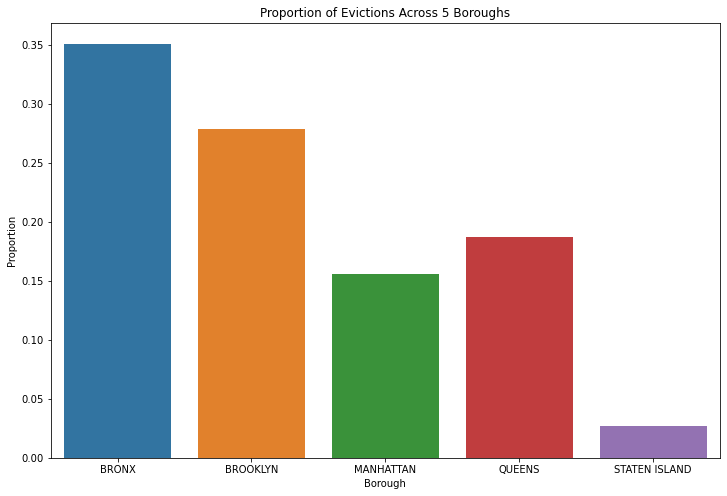

In [25]:
ev_g = pd.DataFrame(NY_evictions_new.groupby('BOROUGH').size()).rename(columns = {0: 'Count'}).reset_index()
ev_g['PROP'] = [i/sum(ev_g['Count']) for i in ev_g['Count']]

plt.figure(figsize = (12, 8))
sns.barplot(x = 'BOROUGH', y = 'PROP', data = ev_g)
plt.ylabel('Proportion')
plt.xlabel('Borough')
plt.title('Proportion of Evictions Across 5 Boroughs')
plt.show()

**Created a new table with three columns: Borough, Count, and Proportion. Count is the number of times each Borough appears in the original table and Proportion is the Proportion of each count to the total number of rows in the original table.**

In [23]:
np.unique(list(NY_evictions_new[["BOROUGH"]].values))

array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [ ]:
NY_housing_dev = pd.read_csv("Housing_New_York_Units_by_Building.csv")
NY_housing_dev

In [ ]:
list(NY_housing_dev.columns)

In [16]:
arrests2 = arrests
arrests2['ARREST_BORO'] = arrests['ARREST_BORO'].replace({'B': 'BRONX', 'S': 'STATEN ISLAND', 
                                                          'K': 'BROOKLYN' , 'M': 'MANHATTAN', 'Q': 'QUEENS'})#.rename({'ARREST_BORO': 'BOROUGH'})
arrests2['YEAR'] = [arrests.loc[i, 'ARREST_DATE'][6:] for i in range(len(arrests['ARREST_DATE']))]                                                  
arrests2 = arrests2.rename(columns = {'ARREST_BORO' : 'BOROUGH'})
arrests2['ONES'] = np.ones(len(arrests2))

grouped = arrests2.groupby(['YEAR', 'BOROUGH']).sum()

grouped

,YEAR,BOROUGH,Unnamed: 0,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,ONES
0,2006,BRONX,3299243875,30832485202,822947.0,472541.0,76390,4356.0,1.722616e+09,423268701.0,69404.834135,-125543.899079,1699.0
1,2006,BROOKLYN,4032560028,36846066552,1030590.0,589930.0,150793,3151.0,2.026783e+09,366329695.0,82423.319865,-149883.702640,2027.0
2,2006,MANHATTAN,3847265559,36320637368,1068787.0,600801.0,38262,3846.0,1.964399e+09,439777225.0,80656.774484,-146308.601661,1978.0
3,2006,QUEENS,2499222262,24042519880,729687.0,451669.0,142903,2410.0,1.359576e+09,264004163.0,53744.479590,-97462.272634,1320.0
4,2006,STATEN ISLAND,418114244,4169463502,122182.0,65046.0,27228,95.0,2.138844e+08,35862913.0,9135.923159,-16677.265002,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2020,BRONX,3318756407,140260883101,255299.0,156233.0,29299,1108.0,6.625498e+08,160734916.0,26669.988135,-48250.312528,653.0
71,2020,BROOKLYN,3760286929,158908676802,322585.0,169249.0,54183,1510.0,7.383878e+08,132014391.0,30085.683794,-54723.801085,740.0
72,2020,MANHATTAN,2960325341,124687287367,226340.0,138795.0,10670,1463.0,5.775629e+08,128325434.0,23729.230304,-43050.917811,582.0
73,2020,QUEENS,2997530060,126802998565,237163.0,146899.0,63640,951.0,6.075760e+08,117261718.0,24020.122835,-43563.095822,590.0


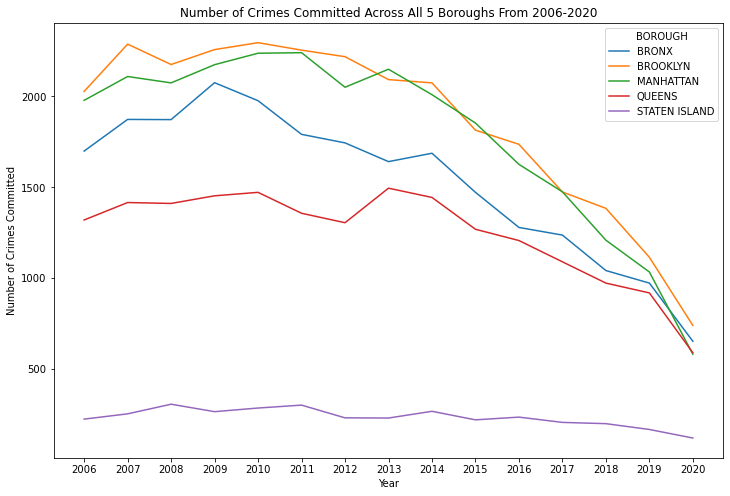

In [20]:
plt.figure(figsize = (12, 8))
sns.lineplot(x = 'YEAR', y = 'ONES', data = grouped, hue = 'BOROUGH')
plt.ylabel('Number of Crimes Committed')
plt.xlabel('Year')
plt.title('Number of Crimes Committed Across All 5 Boroughs From 2006-2020')
plt.show()

**Plotted above is the number of crimes committed over the last 14 years across all 5 boroughs. The ones column represents a counter for each row so that, when summing in the grouby step, each borough will have an accurate number of crimes per year.**

In [ ]:
final_NY_df = pd.merge(arrests2, NY_evictions_new, how = "left", on = 'BOROUGH').fillna(0)
final_NY_df

In [ ]:
final_NY_df.columns

## Everything above is basically just set up. We now have an arrests table that incorporates the geometry data from another table. 

## Below was my attempt to start some analysis and practice creating some visualizations. Just to summarize, I filtered the arrest data by PERP_RACE and neighborhood and took the count of each (PERP_RACE, neighborhood) pair in the race_count table. The Choropleth map has 6 layers (one for each race) and you can select and delect these layers using LayerControl on the top right of the map.  

In [ ]:
arrests

In [ ]:
arrests["PERP_RACE"].value_counts().drop(index=["UNKNOWN"])

In [ ]:
# drop "UNKNOWN" race because we want to focus on known races
races_list = arrests["PERP_RACE"].value_counts().drop(index=["UNKNOWN"]).index.to_list()
races_list

In [ ]:
perp_race = arrests["PERP_RACE"].value_counts()

In [ ]:
neighborhoods = arrests["neighborhood"].value_counts()

In [ ]:
race_count = arrests[["neighborhood", "PERP_RACE"]].value_counts()
race_count = race_count[race_count[["PERP_RACE"]].isin(races_list)].reset_index().rename(columns={"PERP_RACE":"race", 0:"count"})
race_count

In [ ]:
# race_count[race_count["neighborhood"] == "6"].shape[0]

In [ ]:
# neighborhood_names = outlines_df["neighborhood"].value_counts().index.tolist()

# for i in neighborhood_names:
#     all_i = race_count[race_count["neighborhood"] == i]
#     for r in races_list:
#         row = all_i[all_i["race"] == r]
#         if (all_i.shape[0] == 0) or (row.shape[0] == 0):
#             row = pd.DataFrame([[i, r, 0]], columns=["neighborhood", "race", "count"])
#             race_count = pd.concat([race_count, row])
            
# race_count.sort_values(["neighborhood", "race"], ascending=[False, False])

In [ ]:
# len(neighborhood_names) * len(races_list)

In [ ]:
# neighborhood_geojson = json.load(open("nyc_neighborhood_outlines2_raw.txt"))

# bins = np.arange(0, 3501, 500)
# num_legends = 0

# map_by_race = folium.Map(nyc_coords, zoom_start=11)
# for r in races_list:
#     c = folium.Choropleth(
#         geo_data = neighborhood_geojson,
#         data = race_count[race_count["race"] == r],
#         columns = ["neighborhood", "count"],
#         key_on = "feature.properties.neighborhood",
#         fill_color = "Greens",
#         fill_opacity = 0.9,
#         line_opacity = 0.5,
#         legend_name = "Arrest Counts",
#         name = r
#     )
    
#     for key in c._children:
#         if num_legends == 0:
#             num_legends += 1
#             break
#         elif key.startswith("color_map"):
#             del(c._children[key])
            
#     c.add_to(map_by_race)
    
    
# folium.LayerControl().add_to(map_by_race)
    
# map_by_race